In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import time

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
numeric_cols = np.array(df.select_dtypes(include=['int64', 'float64']).columns)
numeric_cols

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm'], dtype=object)

In [7]:
categorical_cols = np.array(df.select_dtypes(exclude=['int64', 'float64']).columns)
categorical_cols

array(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'], dtype=object)

In [8]:
df.groupby('Location').count()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,,
Adelaide,3193,3191,3190,3091,1704,1769,3167,3167,2919,3177,3188,3188,3188,3188,3185,3186,0,0,3188,3189,3091,3090
Albany,3040,2977,2986,3016,2750,2520,0,0,2793,2257,2979,2307,2991,2324,3015,3015,3002,2329,3001,2328,3016,3016
Albury,3040,3029,3029,3011,0,0,3008,3008,2515,2994,3031,3029,3031,3032,3035,3032,1289,1427,3031,3032,3011,3011
AliceSprings,3040,3039,3038,3032,2825,2520,2989,2989,2810,3036,3038,3038,3037,3035,3039,3037,2706,2679,3040,3038,3032,3031
BadgerysCreek,3009,2973,2980,2928,0,0,2933,2933,2574,2924,2960,2961,2955,2954,2841,2836,0,0,2968,2965,2928,2928
Ballarat,3040,3039,3039,3028,0,0,3009,3009,2949,3022,3032,3036,3019,3033,3016,3014,2494,1992,3028,3034,3028,3028
Bendigo,3040,3038,3035,3034,1185,0,2999,3000,2796,2997,3036,3036,3033,3038,3025,3030,2072,2268,3037,3038,3034,3034
Brisbane,3193,3184,3179,3161,3174,3144,3152,3152,3123,3159,3192,3185,3189,3178,3192,3185,3192,3191,3189,3178,3161,3161
Cairns,3040,3039,3040,2988,2670,2564,3021,3022,2997,3036,3039,3039,3039,3040,3039,3040,2833,2810,3039,3040,2988,2988


## Categorical Encoding

In [10]:
from category_encoders import TargetEncoder

In [11]:
# Wind direction to degrees mapping
wind_dir_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

In [12]:
for key, value in wind_dir_map.items():
    wind_dir_map[key] = (value * np.pi) / 180

In [13]:
wind_dir_map

{'N': 0.0,
 'NNE': 0.39269908169872414,
 'NE': 0.7853981633974483,
 'ENE': 1.1780972450961724,
 'E': 1.5707963267948966,
 'ESE': 1.9634954084936207,
 'SE': 2.356194490192345,
 'SSE': 2.748893571891069,
 'S': 3.141592653589793,
 'SSW': 3.534291735288517,
 'SW': 3.9269908169872414,
 'WSW': 4.319689898685966,
 'W': 4.71238898038469,
 'WNW': 5.105088062083414,
 'NW': 5.497787143782138,
 'NNW': 5.8904862254808625}

In [14]:
df[['RainToday','RainTomorrow']] = pd.get_dummies(df[['RainToday','RainTomorrow']], drop_first=True, dtype=int)
df['WindDir9am'] = df['WindDir9am'].map(wind_dir_map)
df['WindDir3pm'] = df['WindDir3pm'].map(wind_dir_map)
df['WindGustDir'] = df['WindGustDir'].map(wind_dir_map)

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df['DayOfYear'] = df['Date'].dt.dayofyear

In [17]:
encoder = TargetEncoder(cols=['Location'])

In [18]:
df['Location'] = encoder.fit_transform(df['Location'], df['RainTomorrow'])

In [19]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DayOfYear
0,2008-12-01,0.203289,13.4,22.9,0.6,NaN,NaN,4.712389,44.0,4.712389,5.105088,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,336
1,2008-12-02,0.203289,7.4,25.1,0.0,NaN,NaN,5.105088,44.0,5.890486,4.319690,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,337
2,2008-12-03,0.203289,12.9,25.7,0.0,NaN,NaN,4.319690,46.0,4.712389,4.319690,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,338
3,2008-12-04,0.203289,9.2,28.0,0.0,NaN,NaN,0.785398,24.0,2.356194,1.570796,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,339
4,2008-12-05,0.203289,17.5,32.3,1.0,NaN,NaN,4.712389,41.0,1.178097,5.497787,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,340


## Imputing missing values

In [20]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
DayOfYear            0
dtype: int64

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [22]:
df_imputed = df.drop('Date',axis=1).copy(deep=True)

In [23]:
imputer = IterativeImputer()

In [24]:
df_imputed.iloc[:, :] = imputer.fit_transform(df.drop('Date',axis=1))

D:\Softwares\Anaconda3\envs\my_env\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [288]:
# def fill_missing_values_of_each_columns(col):
#     rain[col] = rain[col].fillna(rain[col].mean())

In [289]:
# def fill_missing_values_of_categorical(col):
#     rain[col] = rain[col].fillna(rain[col].mode()[0])

In [290]:
# for col in numeric_cols:
#     fill_missing_values_of_each_columns(col)

In [291]:
# for col in categorical_cols:
#     fill_missing_values_of_categorical(col)

In [25]:
df_imputed.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
DayOfYear        0
dtype: int64

In [26]:
df_imputed.shape

(145460, 23)

### Remove outliers

In [27]:
def draw_boxplot(numeric_cols, df):
    n = len(numeric_cols)

    fig, axes = plt.subplots(nrows=(n // 4), ncols=4, figsize=(20, n * 1.5))
    axes = axes.flatten()
    for i, col in enumerate(numeric_cols):
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(col)
    
    plt.tight_layout()
    plt.show()

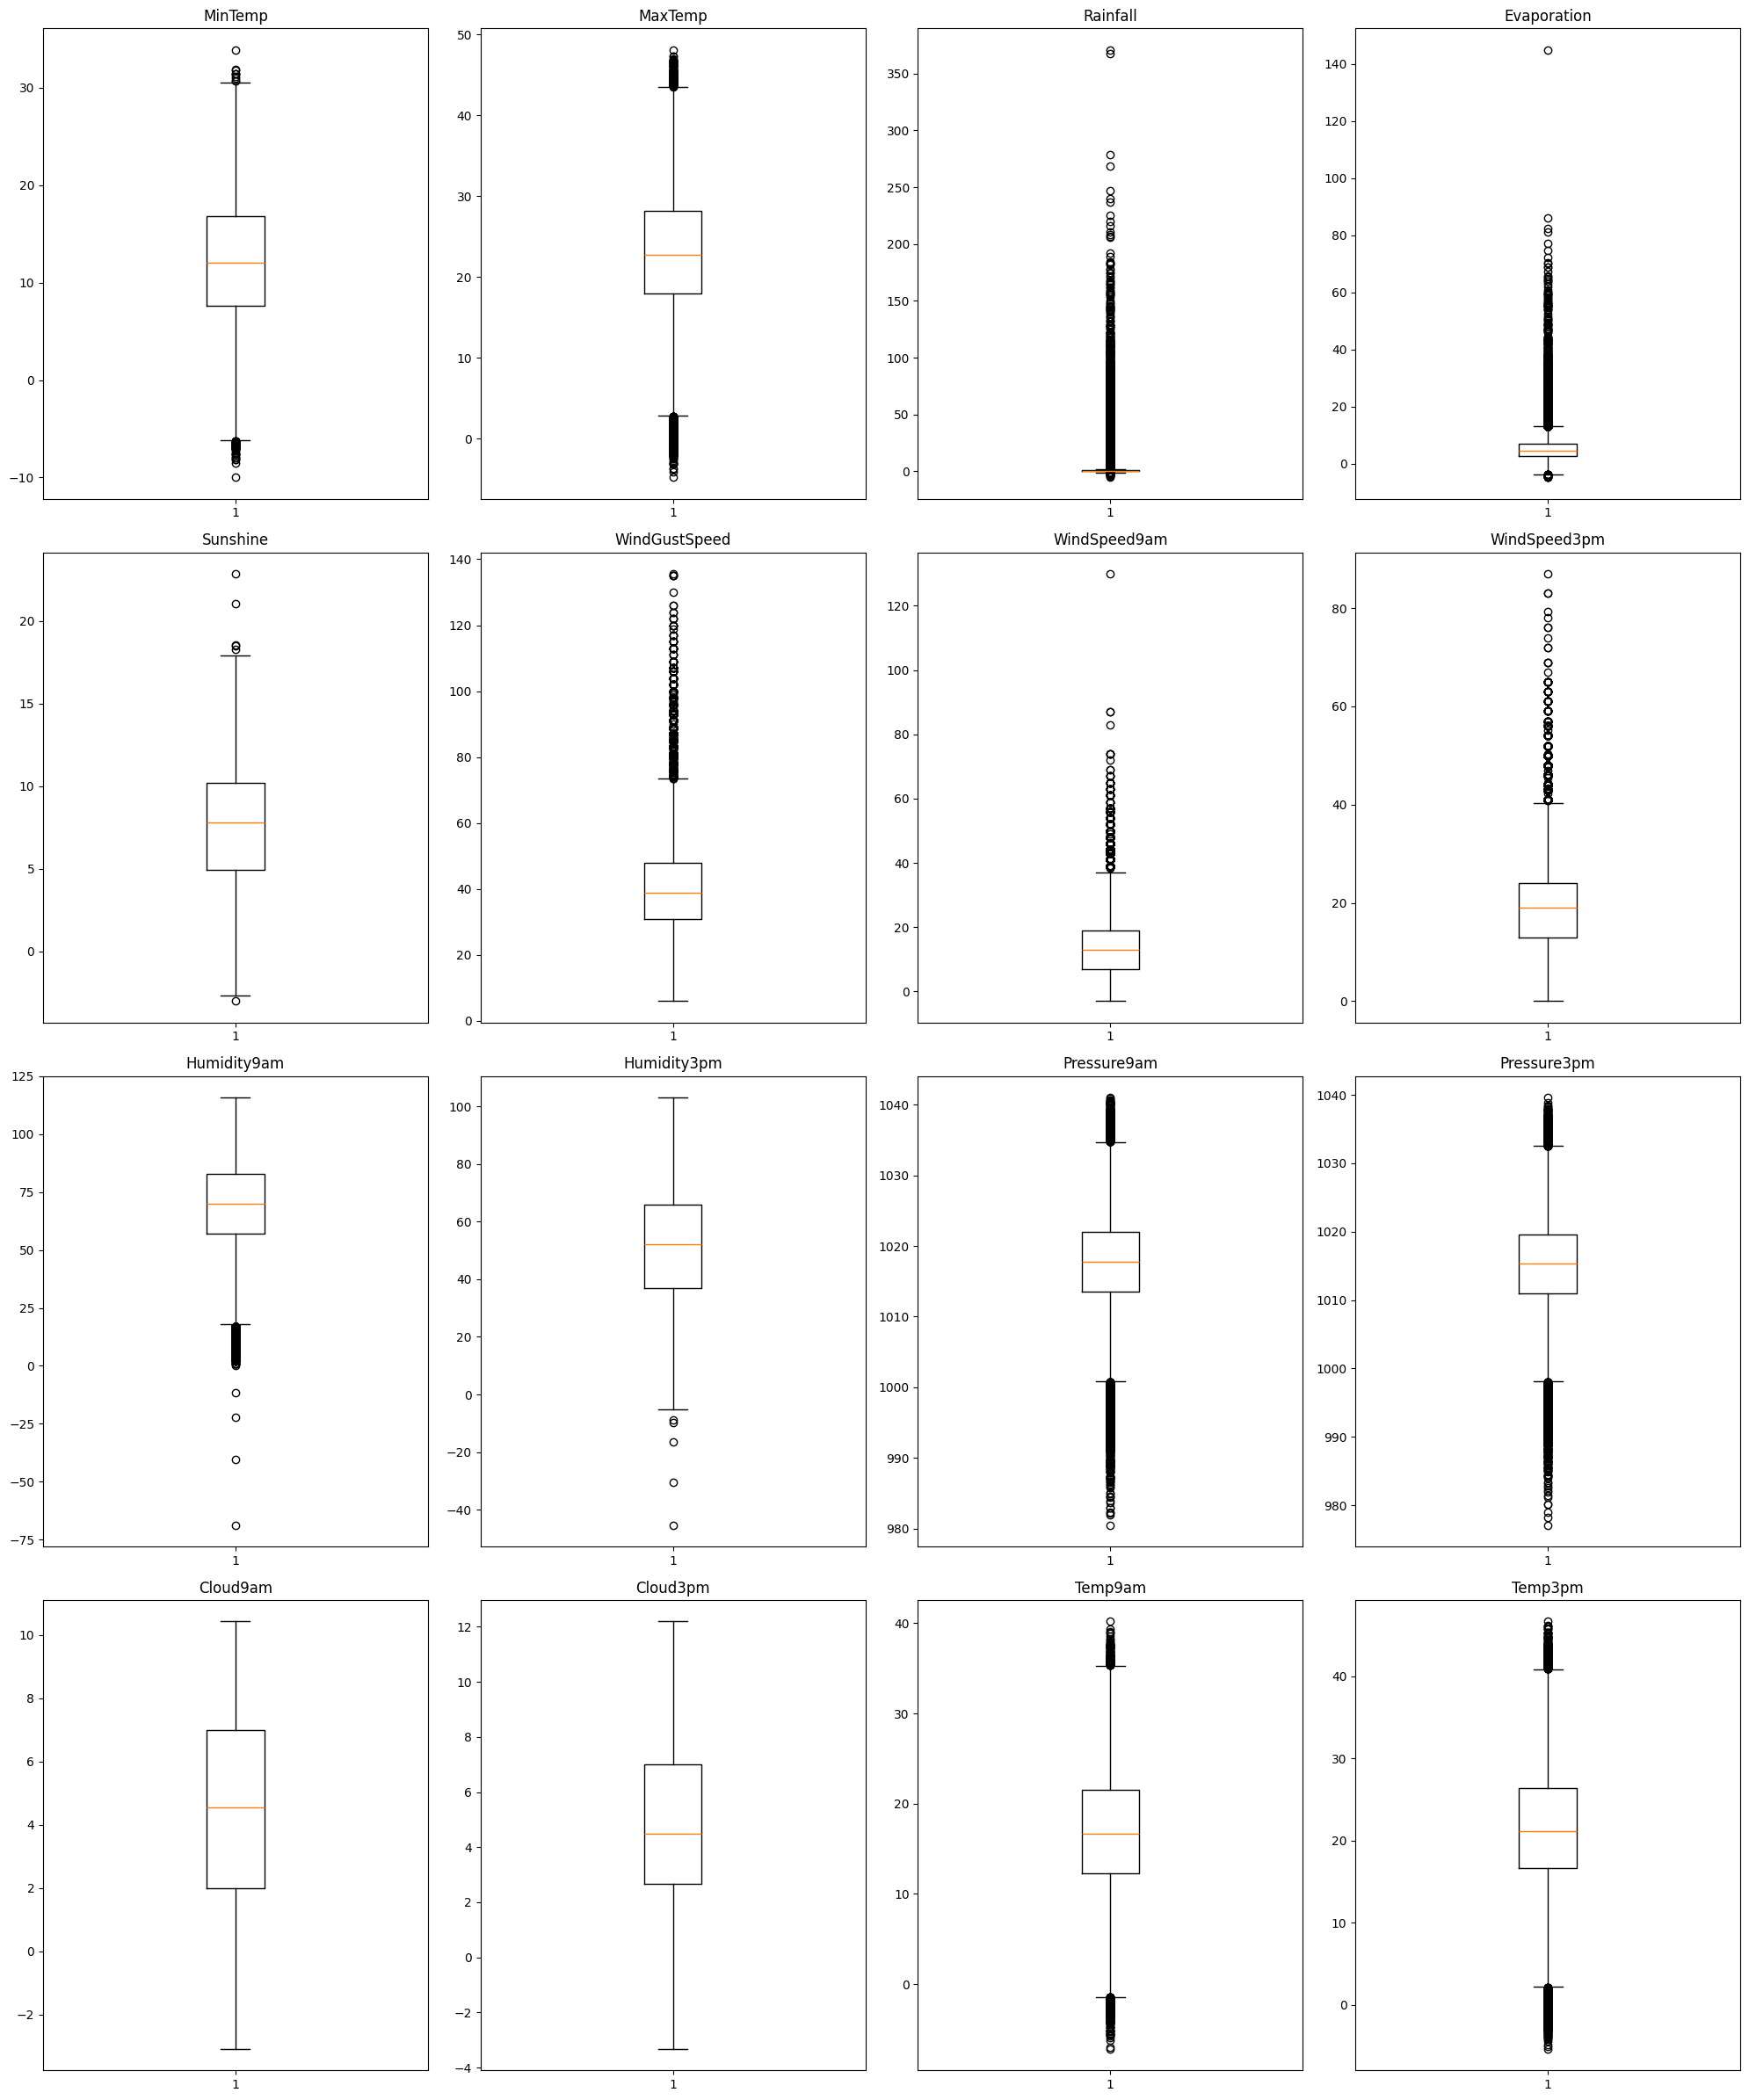

In [28]:
draw_boxplot(numeric_cols, df_imputed)

In [29]:
for col in numeric_cols:
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    n = df_imputed[(df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound)].shape[0]
    print(f'The number of outliers of {col} is {n}')
    # rain = rain[(rain[col] >= lower_bound) & (rain[col] <= upper_bound)]

The number of outliers of MinTemp is 64
The number of outliers of MaxTemp is 549
The number of outliers of Rainfall is 26351
The number of outliers of Evaporation is 3517
The number of outliers of Sunshine is 6
The number of outliers of WindGustSpeed is 3162
The number of outliers of WindSpeed9am is 1821
The number of outliers of WindSpeed3pm is 2536
The number of outliers of Humidity9am is 1429
The number of outliers of Humidity3pm is 5
The number of outliers of Pressure9am is 2401
The number of outliers of Pressure3pm is 1973
The number of outliers of Cloud9am is 0
The number of outliers of Cloud3pm is 0
The number of outliers of Temp9am is 339
The number of outliers of Temp3pm is 875


In [30]:
Q1 = df_imputed[numeric_cols].quantile(0.25)
Q3 = df_imputed[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df_imputed = df_imputed[~((df_imputed[numeric_cols] < lower_bound) |(df_imputed[numeric_cols] > upper_bound)).any(axis=1)]

In [31]:
df_imputed.shape

(109621, 23)

## Splitting and holding out data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

### Check imbalanced target

In [ ]:
df['RainTomorrow'].value_counts(normalize=True).plot(kind='bar')
plt.title('The distribution of values of RainTomorrow')
plt.xticks(rotation=0)
plt.show()

In [35]:
sm = SMOTE(sampling_strategy='minority', random_state=19)

In [106]:
def split_hold_out_samples(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
    X_train_resempled, y_train_resempled = sm.fit_resample(X_train, y_train)
    return X_train_resempled, X_test, y_train_resempled, y_test

In [ ]:
X_train_resempled, X_test, y_train_resempled, y_test = split_hold_out_samples(df_imputed.drop(['RainTomorrow'],axis=1), df_imputed['RainTomorrow'])

In [ ]:
X_test.shape

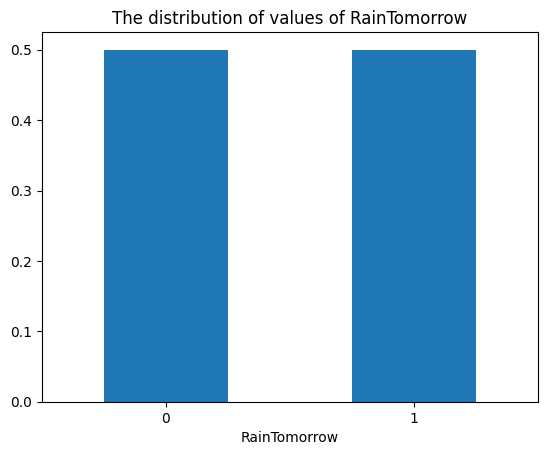

In [81]:
y_train_resempled.value_counts(normalize=True).plot(kind='bar')
plt.title('The distribution of values of RainTomorrow')
plt.xticks(rotation=0)
plt.show()

In [37]:
# X = df_imputed.drop(['RainTomorrow'],axis=1)
# y = df_imputed['RainTomorrow']

In [ ]:
# rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
# rfecv.fit(X, y)

In [ ]:
# selected_features = X.columns[rfecv.support_]

In [76]:
# X = df_imputed.drop(['RainTomorrow'],axis=1)
# y = df_imputed['RainTomorrow']

## Training model

In [41]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, 
confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score)

### Feature selection

In [ ]:
corr = df_imputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

In [35]:
estimator = RandomForestClassifier(random_state=11)

In [ ]:
# Initialize RFE (e.g., select top 10 features)
selector = RFE(estimator=estimator, n_features_to_select=10, step=1)
# Fit RFE
selector.fit(X, y)
# Get mask of selected features
selected_features = X.columns[selector.support_]

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    
    return model, accuracy, roc_auc, coh_kap, time_taken

### Random Forest Classifier model

In [86]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

In [87]:
model_rf = RandomForestClassifier(**params_rf)

In [88]:
model_rf.fit(X_train_resempled, y_train_resempled)

RandomForestClassifier(max_depth=16, random_state=12345)

In [89]:
y_predict = model_rf.predict(X_validation)

In [90]:
accuracy_score(y_validation, y_predict)

0.8701879219120598

In [91]:
f1_score(y_validation, y_predict)

0.6165454055510644

In [92]:
roc_auc_score(y_validation, y_predict)

0.794247643327207

In [101]:
feature_score = pd.DataFrame(model_rf.feature_importances_, columns=['score'])

In [102]:
feature_name = pd.DataFrame(model_rf.feature_names_in_, columns=['feature'])

In [103]:
feature_imp = pd.concat([feature_name.reset_index(drop=True), feature_score.reset_index(drop=True)], axis=1)
feature_imp = feature_imp.sort_values(by='score', ascending=False)['feature'][:10]

In [104]:
feature_imp = np.array(feature_imp)
feature_imp

array(['Sunshine', 'Cloud3pm', 'Humidity3pm', 'Cloud9am', 'Rainfall',
       'Pressure3pm', 'Pressure9am', 'WindGustSpeed', 'Location',
       'Temp3pm'], dtype=object)

### KNN model

In [137]:
X_train_resempled, X_test, y_train_resempled, y_test = split_hold_out_samples(df_imputed[feature_imp], df_imputed['RainTomorrow'])

In [131]:
min_max_sc = MinMaxScaler()

In [110]:
X_train_normalized = scaler.fit_transform(X_train_resempled)
X_validation_normalized = scaler.transform(X_test)

In [111]:
knn = KNeighborsClassifier()

In [112]:
knn.fit(X_train_normalized, y_train_resempled)

KNeighborsClassifier()

In [113]:
y_predict = knn.predict(X_validation_normalized)

In [115]:
accuracy_score(y_predict, y_test)

0.8062029646522235

In [116]:
roc_auc_score(y_test, y_predict)

0.7781677922280233

### Logistic Regression model

In [ ]:
from sklearn.pipeline import make_pipeline

In [147]:
# params_lr = {'penalty': 'l1', 'solver':'liblinear', 'random_state': 39, 'max_iter': 400}

In [132]:
z_score_sc = StandardScaler()

In [158]:
X_train_normalized = scaler.fit_transform(X_train_resempled)
X_test_normalized = scaler.transform(X_test)

In [149]:
# model_lr = LogisticRegression(**params_lr)

In [159]:
model_lr = LogisticRegression(max_iter=500,random_state=41)

In [160]:
model.fit(X_train_normalized, y_train_resempled)

LogisticRegression(max_iter=400, penalty='l1', random_state=39,
                   solver='liblinear')

In [161]:
y_predict = model.predict(X_test_normalized)

In [162]:
accuracy_score(y_predict, y_test)

0.7969897377423033

### Naive Bayes model

In [163]:
model_nb = GaussianNB()

In [164]:
model_nb.fit(X_train_resempled, y_train_resempled)

GaussianNB()

In [165]:
y_predict = model_nb.predict(X_test)

In [166]:
accuracy_score(y_predict, y_test)

0.7453591790193843

### XGBoost model

In [167]:
model_xg = XGBClassifier(n_estimators=200, learning_rate=1, objective='binary:logistic')

In [168]:
model_xg.fit(X_train_resempled, y_train_resempled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [169]:
y_predict = model_xg.predict(X_test)

In [170]:
accuracy_score(y_predict, y_test)

0.8846066134549601

In [241]:
# Sample DataFrames
data1 = {'A': [1, 2], 'B': [3, 4], 'E': [11, 12]}
data2 = {'C': [5, 6], 'D': [7, 8]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Concatenate vertically (by rows)
df_vertical = pd.concat([df1, df2], axis=0, ignore_index=True)

In [242]:
df_vertical

,A,B,E,C,D
0,1.0,3.0,11.0,NaN,NaN
1,2.0,4.0,12.0,NaN,NaN
2,NaN,NaN,NaN,5.0,7.0
3,NaN,NaN,NaN,6.0,8.0
